In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# 타이타닉 데이터를 가지고  mlxtend SequentialFeatureSelector 를 통해서 최적의 피처는 무엇인지 확인하자!
# 전진, 후진, stepwise 3가지 방법으로 피처를 선정할 예정

titanic.dropna(subset=['age','embarked'], inplace=True)

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#get_dummies
titanic = pd.get_dummies(titanic, columns = ['sex','embarked','class'], drop_first= True)

In [ ]:
# 독립변수 종속변수 정리

X= titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'],axis=1)
y= titanic['survived']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

sfs_forward 선택된 특성
('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')
sfs_backward 선택된 특성
('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')
sfs_stepwise 선택된 특성
('pclass', 'age', 'sibsp', 'sex_male', 'embarked_S')


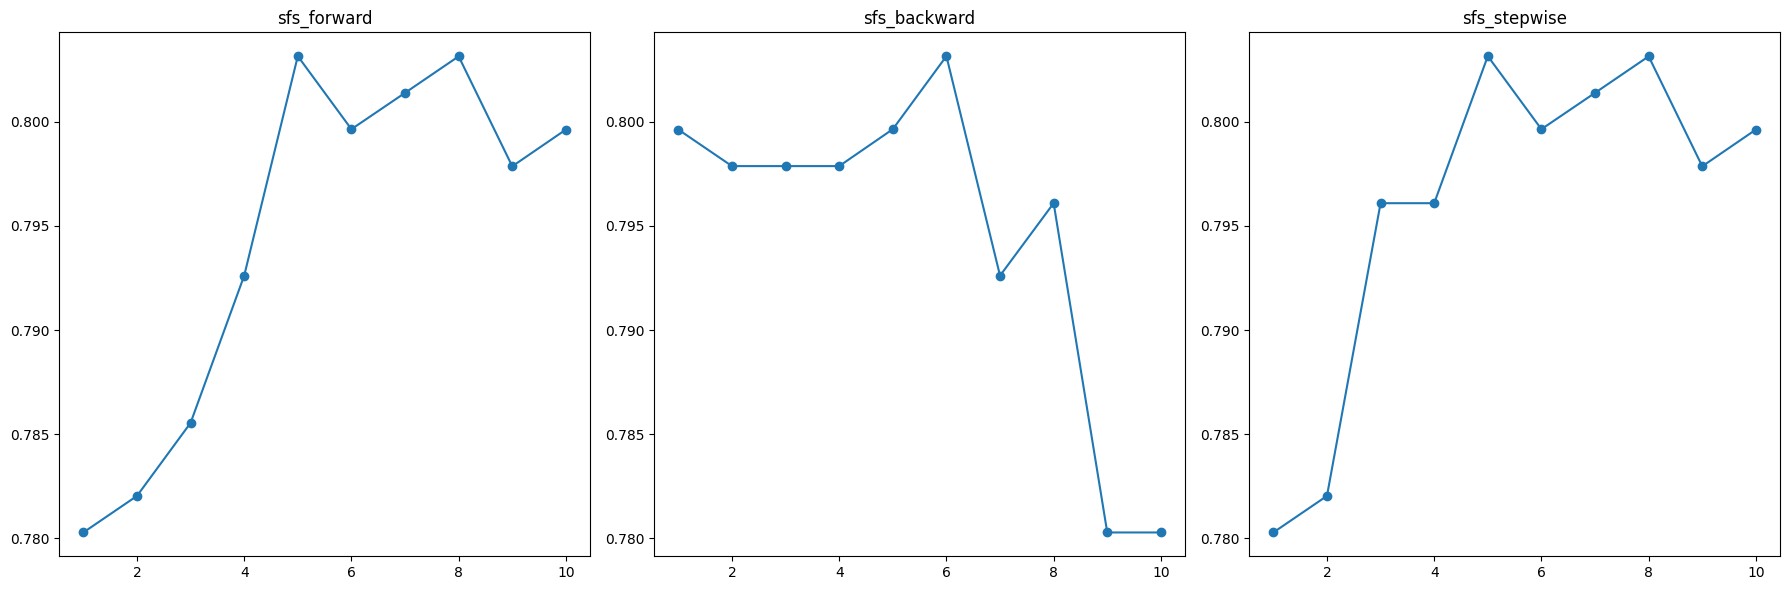

In [ ]:
# 훈련 데이터셋으로 분할

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=111)

# 로지스틱회귀모델 가지고오기
model=LogisticRegression(max_iter=200)


# 각선택법을 가지고 오는 방법
# SFS(모델, 피처선정 어떻게 할건지? best 기타 등등, forward , floating , scoring, cv)
sfs_forward=SFS(model, k_features= 'best', forward= True, floating=False, scoring='accuracy', cv=3)
sfs_backward=SFS(model, k_features= 'best', forward= False, floating=False, scoring='accuracy', cv=3)
sfs_stepwise=SFS(model, k_features= 'best', forward= True, floating=True, scoring='accuracy', cv=3)

# 각 방법을 3개 모두 다 학습 간단하게 fit
sfs_forward =sfs_forward.fit(X_train, y_train)
sfs_backward =sfs_backward.fit(X_train, y_train)
sfs_stepwise =sfs_stepwise.fit(X_train, y_train)

#선택된 특성 출력
#어떤 피처들이 선정되는지?
print('sfs_forward 선택된 특성')
print(sfs_forward.k_feature_names_)


print('sfs_backward 선택된 특성')
print(sfs_backward.k_feature_names_)


print('sfs_stepwise 선택된 특성')
print(sfs_stepwise.k_feature_names_)


#시각화로 실제 어떤 식으로 변화하는지 체크해 보자!
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward.subsets_)+1),[sfs_forward.subsets_[i]['avg_score'] for i in sfs_forward.subsets_], marker='o')
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward.subsets_)+1),[sfs_backward.subsets_[i]['avg_score'] for i in sfs_backward.subsets_], marker='o')
ax[1].set_title('sfs_backward')

ax[2].plot(range(1, len(sfs_stepwise.subsets_)+1),[sfs_stepwise.subsets_[i]['avg_score'] for i in sfs_stepwise.subsets_], marker='o')
ax[2].set_title('sfs_stepwise')

plt.tight_layout()
plt.show()

## RFE, RFECV
- RFE : 반복적으로 훈련시키고, 가장 중요도가 낮은 특성을 하나씩 제거하는 방식, 몇 개 제거할지 등을 지정할 수 있다.
- RFECV : 확장된 버전 -> 교차검증 통해 최적의 특성 수를 자동으로 결정, 반복에서 특성 제거하면서 교차검증으로 수행하여 모델 평가 -> 특성 수 찾기


## 계산방식, 비용함수
- 계산방식 RFE, RFECV 반복적으로 모델 훈련 가장 중요도가 낮은 특성 제거
    - 중요도라는 것은?(E.g. 회귀의 경우 계수, 트리기반 모델의 경우 노트분할 중요도 등등 )
- 비용함수 내부적으로 사용하는 모델에 따라 비용함수나, 성능 평가지표에 따라 특성 중요도 평가


## RFE 하이퍼파라미터 정리
- ***estimator*** : 특성 중요도 평가할 모델 지정, fit(), .coef_, feature_importances_ 속성을 볼 수 있다.
- ***n_feature_to_select*** : 최종 선택으로 원하는 특성의 수, None 절반 특성으로 선택
- ***step***: 반복하면서 제거할 특성 수 또는 비율, step = 1 한 번에 하나의 특성 제거, 0과 1사이의 값이면 특성의 해당 비율을 제거 하는 것


## RFECV

- ***min_featrues_to_select*** : 최소 선택될 특성 수
- ***cv*** : 교차검증 분할 수
- ***scoring*** :모델 성능에 대한 평가 지표

In [ ]:
## iris 데이터로 위의 패키지를 사용해 보자!

X,y=load_iris(return_X_y=True)

In [ ]:
#RFE 모델 생성 및 학습
model =LogisticRegression()

In [ ]:
#RFE 모델 생성 및 학습

selector=RFE(estimator=model, n_features_to_select=2)
selector=selector.fit(X,y)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('선택된 특성 출력', selector.support_)

선택된 특성 출력 [False False  True  True]


### RFECV 코드

In [ ]:
model= RandomForestClassifier()
cv= StratifiedKFold(3)


In [ ]:
#RFECV 모델 만들기
selector =RFECV(estimator=model, step=1, cv=cv)
selector=selector.fit(X,y)

In [ ]:
# 최적의 특성 수 , 선택된 특성 출력

print('최적의 피처 수 ', selector.n_features_)
print('최적의 피처 수 ', selector.support_)

최적의 피처 수  2
최적의 피처 수  [False False  True  True]


In [ ]:
from sklearn.svm import SVC

- LR, RF, SVC 세 개를 진행하자!
- 모델 평가는 정확도~ f1스코어까지
- 교차검증
- 해당 모델들의 피처 선정된 것 정리
----
- 어떤 모델은 어떤 피처를 몇 개 선택했고 그 때 성능까지 정리된 표를 통해 의사결정을 할 수 있다.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 독립변수 종속변수 정리

X= titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'],axis=1)
y= titanic['survived']

# 훈련 데이터셋으로 분할

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=111)


## 모델정의

models ={
    'LogisticRegression':LogisticRegression(max_iter=200),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(kernel='linear')

}

# 교차검증 설정
cv=StratifiedKFold(3)

#결과를 정리할 dataframe
results= pd.DataFrame(columns =['Model','Dataset','Accuracy','Precision','Recall','F1','Selected Features'])

# 각 모델을 RFECV 수행하면서 결과를 잘 넣자!

for name, model in models.items():
    selector = RFECV(estimator= model, step=1, cv=cv, scoring='accuracy')
    selector.fit(X_train, y_train)

    # train, test를 같이 비교하게끔 코드 수정
    for data in [('Train', X_train, y_train), ('Test',X_test, y_test)]:
        dataset_name, X_data, y_data = data
        y_pred = selector.predict(X_data)

        accuracy = accuracy_score(y_data, y_pred)
        precision = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data,y_pred)

        selected_features = ', '.join(X.columns[selector.support_])

        #결과들을 append
        results = results.append({
            'Model':name,
            'Dataset':dataset_name,
            'Accuracy' : accuracy,
            'Precision': precision,
            'Recall':recall,
            'F1':f1,
            'Selected Features': selected_features
        }, ignore_index=True)

print(results)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

                    Model Dataset  Accuracy  Precision    Recall        F1  \
0      LogisticRegression   Train  0.799649   0.765854  0.704036  0.733645   
1      LogisticRegression    Test  0.825175   0.884615  0.707692  0.786325   
2  RandomForestClassifier   Train  0.985940   0.995392  0.968610  0.981818   
3  RandomForestClassifier    Test  0.839161   0.903846  0.723077  0.803419   
4                     SVC   Train  0.780316   0.737864  0.681614  0.708625   
5                     SVC    Test  0.776224   0.811321  0.661538  0.728814   

  Selected Features                                   Seleted Features  
0               NaN  pclass, age, sibsp, parch, sex_male, embarked_...  
1               NaN  pclass, age, sibsp, parch, sex_male, embarked_...  
2               NaN                        pclass, age, fare, sex_male  
3               NaN                        pclass, age, fare, sex_male  
4               NaN                                           sex_male  
5              

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_58337/1341654685.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_58337/1341654685.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


In [ ]:
results

,Model,Dataset,Accuracy,Precision,Recall,F1,Selected Features,Seleted Features
0,LogisticRegression,Train,0.799649,0.765854,0.704036,0.733645,NaN,"pclass, age, sibsp, parch, sex_male, embarked_..."
1,LogisticRegression,Test,0.825175,0.884615,0.707692,0.786325,NaN,"pclass, age, sibsp, parch, sex_male, embarked_..."
2,RandomForestClassifier,Train,0.985940,0.995392,0.968610,0.981818,NaN,"pclass, age, fare, sex_male"
3,RandomForestClassifier,Test,0.839161,0.903846,0.723077,0.803419,NaN,"pclass, age, fare, sex_male"
4,SVC,Train,0.780316,0.737864,0.681614,0.708625,NaN,sex_male
5,SVC,Test,0.776224,0.811321,0.661538,0.728814,NaN,sex_male


# 필수과제 1
- 필수과제 데드라인은 : 5/26 (일) 오후 9시까지 (2주의 시간동안 진행)
- 팀으로 진행하시는 분들 (조별활동, 조별끼리 하나의 과제로 제출 가능합니다. )
- 개인으로 하는 경우 개인 제출
- 필수과제를 제출하지 않거나, 요구사항을 맞추지 못한 경우는 우수학회원이 될 수 없다.


----
- 타이완 파산 신청 데이터
- y값이 파산 유무, 92개 정도 컬럼이 있다. 해당 컬럼의 파산에 대해서 설명한 피처들

- 92개의 피처중에서 실제 파산과 연관이 있는 피처는 무엇인지?
- 그동안 배웠던 방법으로 본인들이 직접 정리해 보시면서 어떤 피처가 최적의 피처인지를 선정하고 그랬을 때 본인한 선택 모델의 성능까지도 정리해 주시면 됩니다.

- 필수과제1.1
    - 해당 로우데이터의 시각화 및 탐색, 기본적인 EDA 필수
    
- 필수과제1.2
    - 다양한 피처선정을 배웠으니 최대한 모두 사용해서 어떤 피처를 선택할지를 꼭 정리하기!

- 필수과제1.3
    - 선정된 피처로 모델을 돌려서 ( 모델은 기본 베이스로만 하셔도 됩니다. ) 단 3개 이상은 모델을 사용하여서, 평가지표 정확도, 정밀도, f1, 재현율 다 정리하여서 어떤 모델과 어떤 피처가 최적인지를 공유해 주세요.